<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/03_Images_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03 - Példa - Baktérium számlálás és területszámítás threshold alapú képszegmentálással

Ebben a példában mikroszkóppal készült képen számoljuk ki a képen látható baktériumok által elfoglalt terület nagyságát. Ezen a példán keresztül mutatom be a threshold alapú képszegmentálás egyes lépéseit.A képeket Griffin Chure a Caltech munkatársa tette közzé és ingyenesen hozzáférhetőek.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology
import scipy.ndimage as ndi
import seaborn as sns

In [3]:
image_bacteria = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/bacteria2.tif?raw=true')

print(image_bacteria.shape)

print(image_bacteria.max())

(1040, 1392)
1043


A képek betöltéséhez a skimage könyvtárat használom. A képek 8-bit, 16-bit, vagy 32-bitesek lehetnek. Néhány eszköz azonban 12-bites képeket készít. A skimage könyvtár azonban ezeket a képeket is kezelni tudja és beolvasás után Numpy.array formába konvertálja őket.

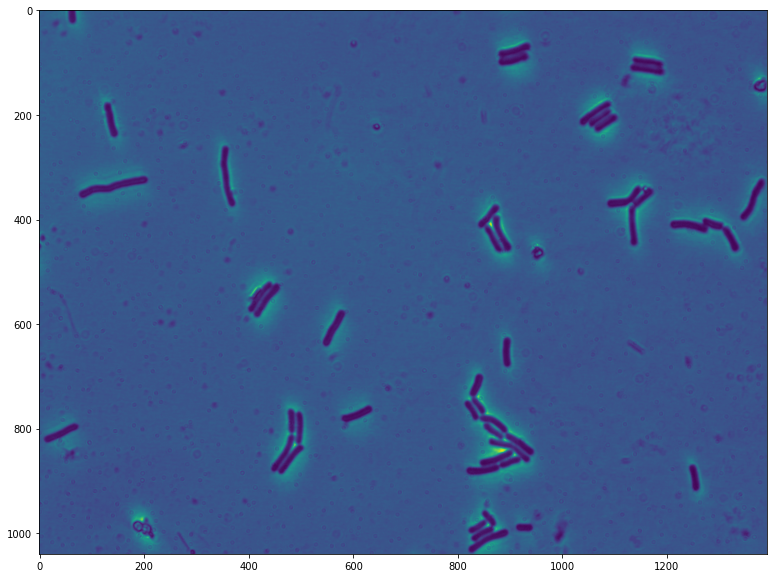

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize = (20, 10))

ax1.imshow(image_bacteria);



Fontos, hogy ezekhez az adatokhoz bármilyen színtérképet hozzárendelhetünk. Ezek a képek mesterségesen színezettek. Ahogy az alábbi ábrán megmutatom tetszőleges szintáblát adhatunk hozzá.

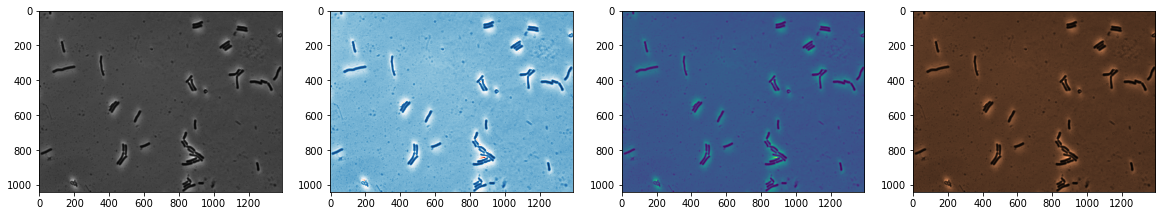

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))

ax1.imshow(image_bacteria, cmap=plt.cm.gray)
ax2.imshow(image_bacteria, cmap=plt.cm.RdBu_r)
ax3.imshow(image_bacteria, cmap=plt.cm.viridis)
ax4.imshow(image_bacteria, cmap=plt.cm.copper)

plt.show()

# Képszegmentálás

A képszegmentálás egy olyan folyamat ahol különböző régiókra osztjuk, bontjuk a képet. Ezen a képen megprbáljuk a hátteret leválasztani a képről és fenmaradó régiók alatti képpontokat összeszámoljuk. Ezáltal megállapítható, hogy kép egészéhez képest mekkora területet foglalnak el a baktériumok.

## Histograms

A histogram a képpontok gyakoriságát ábrázolja intenzitásuk szerint. A függőleges tengelyen az előfordulás gyakorisága, a vízszintes tengelyen a képpont intezitása szerepel. Ezzel az eljárással a képpontok intenzitásának eloszlásáról kapunk hozzávetőleges képet.

Az alábbi ábrán a fenti kép histogramját ábrázoltam. A 400-as és hozzá közel állóö intenzitású képpontok gyakorisága a legmagasabb. Az igazán 'sötét' és 'világos' képpontok száma lényegesen alacsonyabb.

Text(0, 0.5, 'count')

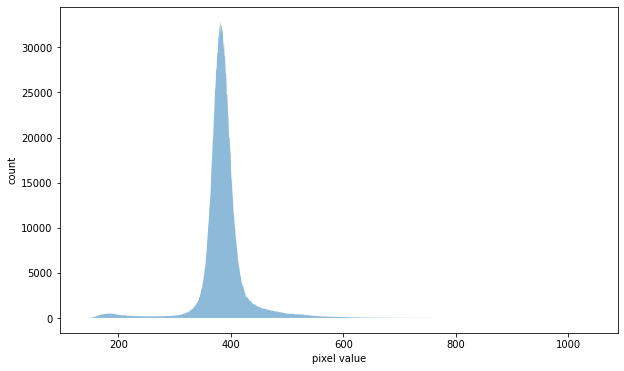

In [6]:
hist_phase, bins_phase = skimage.exposure.histogram(image_bacteria)

plt.rcParams["figure.figsize"] = (10,6)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

A képpontok intenzitása alapján két csoportja oszthajuk a képpontokat. Adhatunk olyan feltételt, hogy az egyik csoportba tartozzanak azok amelyek intenzitása egy adott szint alatt van és másik csoportba amelyek intázitása az adott pont fölött van.

Ha még emlékszünk az eredeti képre, a baktériumok képpontjainak intenzitása alacsony, miközben a háttér valamivel 'világosabb'. Ezt a tényt kihasználva, a képpontokat két részre bonthatjuk. Az alacsony intenzítású képpontok lesznek a baktériumok, az ennél 'világosabb' képpontokat pedig figyelmen kívül hagyjuk.

Később - a második példában - az így keleletkezett régiókat összeszámoljuk, és ez alapján becsüljük meg a képen látható baktériumok számát.

Text(0, 0.5, 'count')

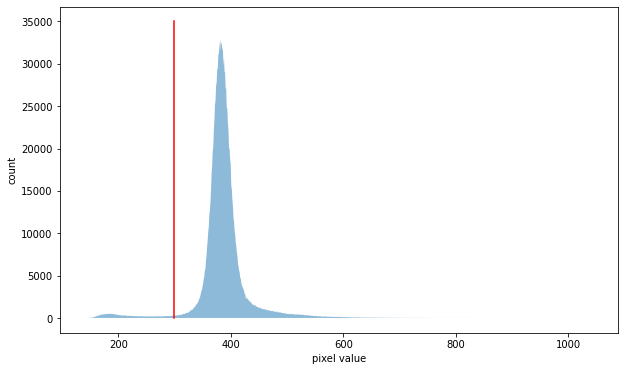

In [7]:
# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)
plt.plot([300, 300], [0,35000], linestyle='-', marker='None', color='red')

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

A fenti képen a 300-nál magasabb értékkel rendelkező képpontokat figyelmen kívül hagyjuk. Az alábbi programkód ennek a szabálynak az alapján létrehoz egy új képet.

# Küzsöbérték alapú szegmentáció

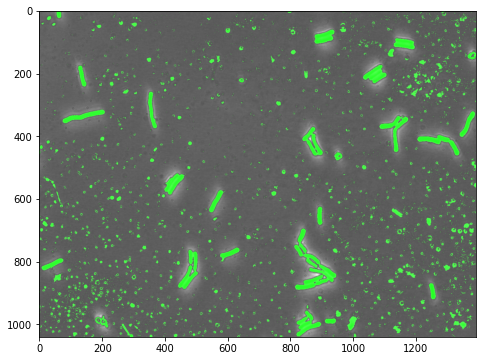

In [8]:
# Küszöbérték
thresh_phase = 350

# Új kép létrehozása a szabály alapján
image_bacteria_bw = image_bacteria < thresh_phase

# A szürkeárnyalatos képet RGB formába alakítom
im_phase_rgb = np.dstack(3 * [image_bacteria / np.max(image_bacteria)])

# A zöld csatorna értékeit 1.0 értékre állítom ott, ahol az eredeti képen
# fehér szín volt.
im_phase_rgb[image_bacteria_bw, 1] = 1.0

# Megjelenítés
plt.imshow(im_phase_rgb)
plt.show()


Sajnos nem csak a baktériumok sikerült ilyen módon kiemelnünk de a képen látható zajt is.

# Van azonban egy másik képrögzítési eljárás is
Amely alapján jobb kevésbé zajos, homogén hátteret kapunk. Nézzünk meg egy ilyen képet is amelyet szintén egy kutató tett közzé.

Ezen a képen az látszik, hogy baktériumok jellemzően nagyobb fényerővel rendelkeznek, vagyis a képen a hozzájuk tartozó képpontok intenzitása magasabb mint az öket körülvevő hátteré.

Ezért ebben az esetben a pont fordítva járunk el mint az első esetben és magasabb intenzitású képpontokat válogatjuk le.

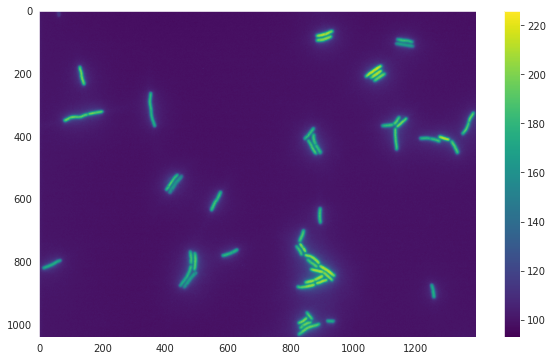

In [9]:
# Kép betöltése
image_cfp = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/bacteria1.tif?raw=true')

# Kép megjelenítése mesterséges szinezéssel
with sns.axes_style('dark'):
    plt.imshow(image_cfp, cmap=plt.cm.viridis)

    plt.colorbar()

# Zajszűrés medián módszerrel

Bár elsőre nem látható, de a képen vannak olyan részek, ahol a képontok intenzitása kiugró. (lásd alább) Holott ezek nem tartoznak a baktériumokhoz. Ezeket a képontokat valamilyen élsimító eljárással kiszűrhetjük.

Alább egy példa egy ilyen képpontra a [150:250,450:550] régióban.

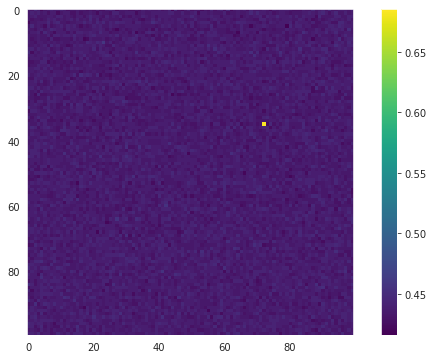

In [10]:
with sns.axes_style('dark'):
    plt.imshow(image_cfp[150:250,450:550] / image_cfp.max(), cmap=plt.cm.viridis)

    plt.colorbar()


Medián szűrővel el tudjuk távolítani ezeket a környezetükből kiugró képpontokat.
A skimage python könyvtár beépített fügvénye lehet a segítségünkre. Elöször egy 3 x 3 nagyságú szűrővel próbálkozom.

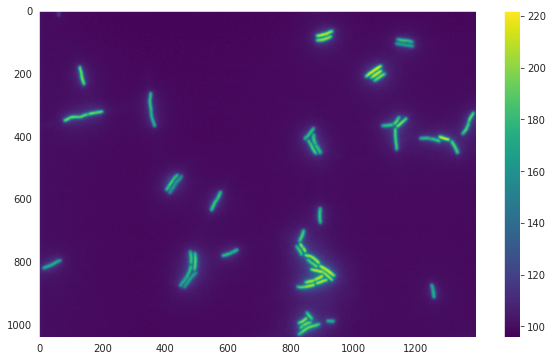

In [11]:
# Median szűrő beállítása
selem = skimage.morphology.square(3)

im_cfp_filt = skimage.filters.median(image_cfp, selem)

with sns.axes_style('dark'):
    plt.imshow(im_cfp_filt, cmap=plt.cm.viridis)
    plt.colorbar()


Ha megszabadultunk a környezetűkből kiugró értékeketől, akkor végezzük el a képpontok intenzitásán alapuló képszegmentációt és 'vágjuk ketté' a képet 120-ös intenzitás szerint.

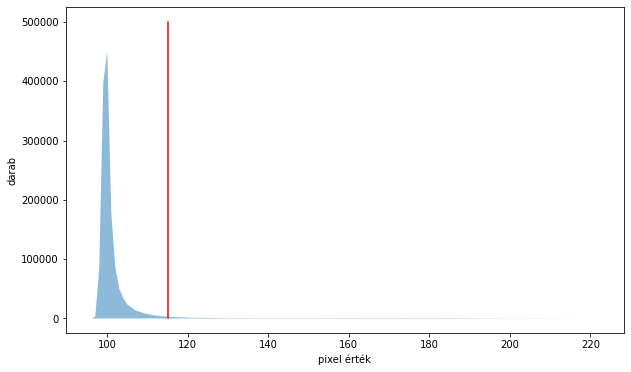

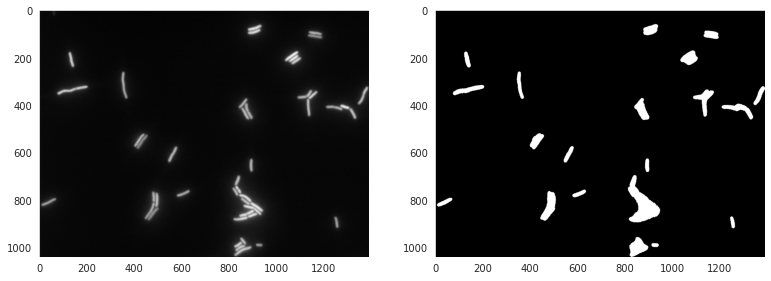

In [12]:
# Histogram
hist_cfp, bins_cfp = skimage.exposure.histogram(im_cfp_filt)

# Plot histogram
plt.fill_between(bins_cfp, hist_cfp, alpha=0.5)
plt.plot([115, 115], [0, 500000], 'r-')

# Label axes
plt.xlabel('pixel érték')
plt.ylabel('darab')

# Küszöbérték
thresh_cfp = 120

# Új kép a threshold alapján
im_cfp_bw = im_cfp_filt > thresh_cfp

# Vizualizáció
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    ax[0].imshow(im_cfp_filt, cmap=plt.cm.gray)
    ax[1].imshow(im_cfp_bw, cmap=plt.cm.gray)

Felül a gyakoriság eloszlása, baloldalon alul az eredeti kép, jobb oldalon a küszöbérték feletti képpontok fehér színnel jelőlve.

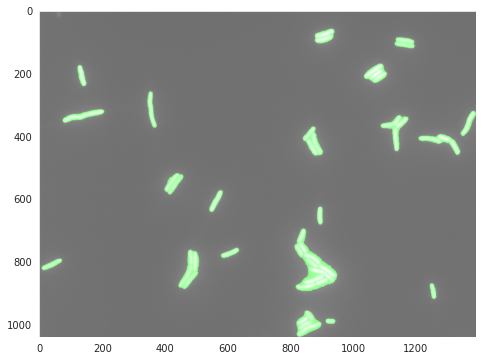

In [13]:
# RGB kép egy színcsatornából
im_cfp_rgb = np.dstack(3 * [im_cfp_filt / im_cfp_filt.max()])

# A zöld szincsatorna értékét megemeltem 1.0-re (egyébként 0-1 közé van normálva minden képponthoz tartozó érték)
im_cfp_rgb[im_cfp_bw, 1] = 1.0

# Vizualizáció
with sns.axes_style('dark'):
    plt.imshow(im_cfp_rgb)

# Otsu's módszer

Annak eldöntésére, hogy hol húzzuk meg azt a küszöbértéket amely alatt és fölött 'két részre' bontjuk a képet nem mindíg lehet könnyen eldönteni, de vannak előre elkészített algoritmusok a skiimage könyvtárban.

Az egyik ilyen kerül most bemutatásra.

In [18]:
# Mindkét típusú képen alkalmazzuk az eljárást
thresh_phase_otsu = skimage.filters.threshold_otsu(image_bacteria)
thresh_cfp_otsu = skimage.filters.threshold_otsu(im_cfp_filt)

# Compare results to eyeballing it
print('Phase kép saját döntés alapján: \t', thresh_phase, '   CFP saját döntés alapján:\t', thresh_cfp)
print('Phase kép Otsu algoritmus szerint:\t', thresh_phase_otsu,   
      '   CFP kép Otsu algoritmus szerint:', thresh_cfp_otsu)

Phase kép saját döntés alapján: 	 350    CFP saját döntés alapján:	 120
Phase kép Otsu algoritmus szerint:	 437    CFP kép Otsu algoritmus szerint: 135


Az Otsu küszöbérték alapú szegmentáló algoritmusról itt olvashat többet.

https://en.wikipedia.org/wiki/Otsu%27s_method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


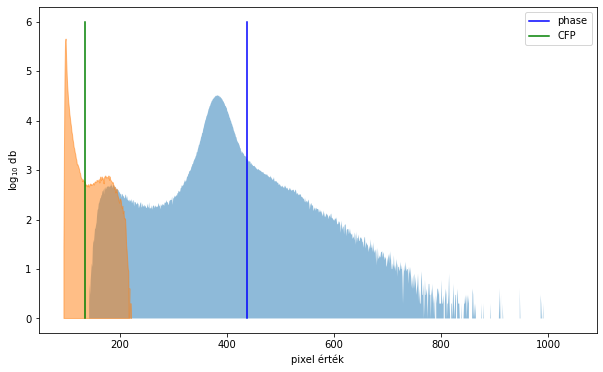

In [20]:
# A két típusú kép histogramja együtt, a küszöbértékekkel feltűntetve

plt.fill_between(bins_phase, np.log10(hist_phase), alpha=0.5)
plt.fill_between(bins_cfp, np.log10(hist_cfp), alpha=0.5,
                 color=sns.color_palette()[1])
plt.plot([thresh_phase_otsu, thresh_phase_otsu], [0, 6], 'b-')
plt.plot([thresh_cfp_otsu, thresh_cfp_otsu], [0, 6], 'g-')
plt.legend(('phase', 'CFP'), loc='upper right')

plt.xlabel('pixel érték')
plt.ylabel('log$_{10}$ db')
plt.show()

# Terület számítás kép alapján

Ezekután próbáljuk meghatározni a trheshold érték fölötti képpontok számát, hogy megkapjuk a baktériumok álltal elfoglalt terület nagyságát.

In [21]:
# Baktérium terület
bacterial_area_pix = im_cfp_bw.sum()

print('A baktériumok által elfoglalt képpontok száma =', bacterial_area_pix, 'képpont')

A baktériumok által elfoglalt képpontok száma = 50700 képpont


A képeket közrebocsájtó kutató elmondásából tudjuk, hogy a képen egy képpont 0.0636 µm-nek felel meg. Ez alapján ki tudjuk számolni, hogy mekkora az adott terület.

In [22]:
# Egy pixel nagysága mikrométerben
interpix_dist = 0.063

# Terület nagysága
bacterial_area_micron = bacterial_area_pix * interpix_dist**2

print('A terület nagysága =', bacterial_area_micron, 'négyzet mikrométerben')

A terület nagysága = 201.22830000000002 négyzet mikrométerben
